# Importing Libraries

* System Append to set proper path

In [1]:
sys.path.append('../Source/Utils') # adds the auxilliary functions to the path

* Default

In [54]:
import lasio
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

* Pandas Options

In [3]:
pd.set_option('max_columns', None)

* Source Code

In [4]:
import welllog

* Tqdm Progress Bar

In [5]:
%%capture
from tqdm import tqdm_notebook

# Reading Miscellaneous Data

In [6]:
file_path = '../data/Lithology code data.xlsx'

file_path2 = '../data/NPD stratigraphic picks north sea.xlsx'

litho_code = pd.read_excel(file_path)

picks = pd.read_excel(file_path2)

* Lithology Code 

In [7]:
litho_code.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Lithology,Color,Lithology Attribute,Abbreviation
1,Aeolian Sandstone,LightYellow,CrossBedded Sand,35
2,Anhydrite,Light Magenta,Anhydrite,22
3,Argillaceous Limestone,Dodger Blue,Chalk,12
4,Arkose,LightGoldenrod,Gravel,36


        * Fixing Columns IDs

In [8]:
litho_code.columns = litho_code.iloc[0]

        * Droping first row (as it has become the columns ids now)

In [9]:
litho_code.drop(index=0, inplace=True)

        * Checking Final Result

In [10]:
litho_code.head(5)

,Lithology,Color,Lithology Attribute,Abbreviation
1,Aeolian Sandstone,LightYellow,CrossBedded Sand,35
2,Anhydrite,Light Magenta,Anhydrite,22
3,Argillaceous Limestone,Dodger Blue,Chalk,12
4,Arkose,LightGoldenrod,Gravel,36
5,Basement,Salmon,Intrusive,23


* Stratigraphic Picks

In [11]:
picks.head()

,Unnamed: 0,Well identifier,Surface,X,Y,Z,MD,Geological age,TVT,TST,Interpreter,Observation number
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.90,1382.0,4.21,NaN,NaN,NPD,1
1,21660,10/4-1,Roedby Fm. Top,628531.41,6394710.62,-1350.90,1382.0,98.90,NaN,NaN,NPD,1
2,21656,10/4-1,Sola Fm. Top,628531.47,6394710.62,-1381.90,1413.0,102.50,NaN,NaN,NPD,1
3,21664,10/4-1,Aasgard Fm. Top,628531.50,6394710.61,-1397.90,1429.0,117.00,NaN,NaN,NPD,1
4,21668,10/4-1,VESTLAND GP. Top,628531.27,6394713.59,-2242.88,2274.0,1.00,NaN,NaN,NPD,1


        * Renaming Unidentified Column

In [12]:
picks.rename(columns={'Unnamed: 0': 'Unidentified Column'}, inplace=True)

        * Checking Result

In [13]:
picks.head(n=2)

,Unidentified Column,Well identifier,Surface,X,Y,Z,MD,Geological age,TVT,TST,Interpreter,Observation number
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,NPD,1
1,21660,10/4-1,Roedby Fm. Top,628531.41,6394710.62,-1350.9,1382.0,98.90,NaN,NaN,NPD,1


# Reading Las files Dataset

In [120]:
path = '..//data/GEOLINK_Lithology and wells NORTH SEA/'

npd_wells_las = welllog.read_las_directory(path)

* Las files first look

In [121]:
print('Number of las files read: ', len(npd_wells_las))
print('##########################')
print('Las files IDs: ', npd_wells_las.keys())
print('##########################')
print('Printing a las file header: ', npd_wells_las['33_6-3 S'].curves)


Number of las files read:  223
##########################
Las files IDs:  dict_keys(['15_9-12', '15_9-13', '15_9-14', '15_9-15', '15_9-17', '15_9-18', '15_9-19 A', '15_9-19 B', '15_9-2', '15_9-22', '15_9-23', '15_9-4', '15_9-5', '15_9-7', '15_9-8', '15_9-9', '16_1-2', '16_1-6 A', '16_10-1', '16_10-2', '16_10-3', '16_10-4', '16_10-5', '16_11-1 S', '16_11-2', '16_2-11 A', '16_2-16', '16_2-6', '16_2-7', '16_4-1', '16_4-2', '16_5-3', '16_6-1', '16_7-1', '16_7-2', '16_7-3', '16_7-4', '16_7-5', '16_7-6', '16_7-7 S', '16_7-8 S', '16_8-1', '16_9-1', '17_11-1', '17_4-1', '24_12-2', '25_10-10', '25_10-2 R', '25_10-3', '25_10-4 R', '25_10-8 A', '25_10-8', '25_10-9', '25_11-1', '25_11-15', '25_11-19 S', '25_11-23', '25_11-24', '25_11-5', '25_2-13 T4', '25_2-14', '25_2-5', '25_2-6', '25_2-7', '25_3-1', '25_4-1', '25_4-5', '25_5-1', '25_5-2', '25_5-3', '25_5-4', '25_6-1', '25_6-2', '25_6-3', '25_7-2', '25_8-1', '25_8-5 S', '25_8-7', '25_8-9', '25_9-1', '26_4-1', '29_3-1', '29_6-1', '30_11-3', '30_2-

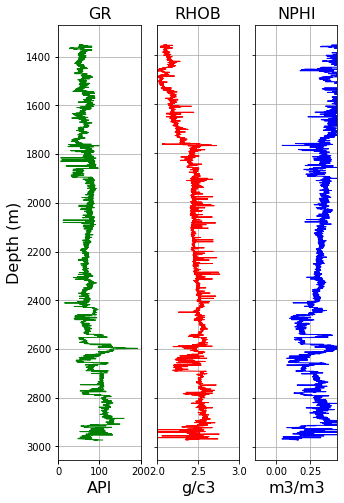

In [122]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(5, 8)


ax1.plot(npd_wells_las['35_9-7']['GR'], npd_wells_las['35_9-7'].index, 'g', linewidth = 1, label='GR')
ax1.invert_yaxis()
ax1.tick_params(which='both', width=1)
ax1.grid()
ax1.set_ylabel('Depth (m)', fontsize=16)
ax1.set_xlabel('API', fontsize=16)
ax1.set_title('GR', fontsize=16)
ax1.set_xlim(0,200)

#_____________________________________________________#

ax2.plot(npd_wells_las['35_9-7']['RHOB'], npd_wells_las['35_9-7'].index, 'r', linewidth = 1, label='RHOB')
ax2.invert_yaxis()
ax2.grid()
ax2.set_yticklabels([])
ax2.set_xlabel('g/c3', fontsize=16)
ax2.set_title('RHOB', fontsize=16)
ax2.set_xlim(2,3)

#_____________________________________________________#

ax3.plot(npd_wells_las['35_9-7']['NPHI'], npd_wells_las['35_9-7'].index, 'b', linewidth = 1, label='NPHI')
ax3.invert_yaxis()
ax3.grid()
ax3.set_yticklabels([])
ax3.set_xlabel('m3/m3', fontsize=16)
ax3.set_title('NPHI', fontsize=16)
ax3.set_xlim(-0.15,0.45)

plt.show()

# Building the main dataframe

* Checking unmatching unit of measurement for each log curve

In [123]:
unit_mismatch_list = welllog.unit_check(npd_wells_las)




It was found a total of 0 unmatching unit of measurement in the dataset. Please, check the flag output for proper adjustments


* Converting all las files to dataframe

In [124]:
npd_wells_df = {}

for id in tqdm_notebook(list(npd_wells_las.keys()), desc='Converting to dataframe'):

    npd_wells_df[id] = npd_wells_las[id].df()

MemoryError: Unable to allocate 2.74 MiB for an array with shape (17, 21128) and data type float64

In [ ]:
* Creating main dataframe

In [119]:
# Example of las file converted to dataframe
# Each well dataframe corresponds to a dictionary key

npd_wells_df['29_6-1'].head()

,LITHOLOGY_GEOLINK,CALI,DRHO,SGR,NPHI,RHOB,PEF,GR,DTC,DTE,RDEP,SP,RSHA,RMED
DEPT,,,,,,,,,,,,,,
1099.499878,NaN,17.594,NaN,NaN,NaN,2.342295,NaN,40.340645,136.702438,153.220276,1.827971,50.518002,0.207000,1.963976
1099.652344,NaN,17.594,NaN,NaN,NaN,2.340529,NaN,38.255703,137.245056,153.748947,1.809964,50.048801,0.235956,1.948964
1099.804688,NaN,17.594,NaN,NaN,NaN,2.340255,NaN,40.619041,137.294724,153.830200,1.794986,49.799000,0.181000,1.933968
1099.957031,NaN,17.594,NaN,NaN,NaN,2.341460,NaN,36.906200,136.893768,153.482407,1.785987,49.674000,0.220000,1.913974
1100.109497,NaN,17.594,NaN,NaN,NaN,2.342651,NaN,37.031826,136.698807,153.132996,1.778014,49.251999,0.223000,1.897986


In [118]:
# Creating a main empty dataframe

col = {'LITHOLOGY_GEOLINK':[], 'CALI':[], 'NPHI':[], 'RHOB':[], 'GR':[], 'DTC':[], 'RDEP':[], 'WELL_NAME':[]}
df_main = pd.DataFrame(columns=list(col))

df_main

,LITHOLOGY_GEOLINK,CALI,NPHI,RHOB,GR,DTC,RDEP,WELL_NAME


In [ ]:
# Appending the dataframes of two wells

df_main = df_main.append(df[lista])
df_main = df_main.append(df1[lista])


df_main

# ^^^^ Aqui a ideia é fazer um laço onde os indices serão todos os arquivos las do diretório '..//data/GEOLINK_Lithology and wells NORTH SEA/'

* Checking unmatching unit of measurement for each log curve

In [ ]:
unit_mismatch_list = welllog.unit_check(npd_wells)

* Converting all las files to dataframe